In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from adastab import AdaStab
from OurAdam import Adam
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
torch.cuda.is_available()

True

In [2]:
batch_size = 128
learning_rate = 1e-4
max_epoch = 10

In [4]:
transform_train = transforms.Compose([
    # transforms.RandomCrop(32, padding=4),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_train)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
class OurCifarNet(nn.Module):
    # Modified from AlexNet
    def __init__(self, num_classes=10):
        super(OurCifarNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),)

        self.classifier = nn.Sequential(
            nn.Dropout(),

            nn.Linear(128 * 6 * 6, 1000),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1000, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 128 * 6 * 6)
        x = self.classifier(x)
        return x


In [25]:
def cifartest():
#     correct = 0
#     total = 0
#     with torch.no_grad():
        test_loss = 0
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = Variable(inputs, volatile=True),Variable(targets, volatile=True)
            inputs, targets = inputs.cuda(), targets.cuda()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss
        print('test loss:{}'.format(test_loss/(batch_idx+1)))
    
        return test_loss/(batch_idx+1)
#             _, predicted = outputs.max(1)
#             total += targets.size(0)
#             correct += predicted.eq(targets).sum().item()

#             progress_bar(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
# % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

#     print('Accuracy of the network on the 10000 test images: %d %%' % (
#         100 * correct / total))

In [36]:
def cifartrain(test=False):
    for epoch in range(max_epoch):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
        # get the inputs
            inputs, labels = data
            inputs = Variable(inputs)
            labels = Variable(labels)
            inputs = inputs.cuda()
            labels = labels.cuda()

        # zero the parameter gradients
            optimizer.zero_grad()

        # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss
        
        print('epoch{}, loss{}'.format(epoch, running_loss/(i+1)))
        LOSS[0, epoch] = running_loss/(i+1)
        # Test every epoch
        if test:
            Test_LOSS[0, epoch] = cifartest()
    
    print('Finished Training')
    return LOSS, Test_LOSS

## Adam

In [27]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
Test_LOSS = np.zeros([1, max_epoch])
learning_rate = 5e-4
optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=False)
# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS, Test_LOSS= cifartrain()
# sio.savemat('Adam_5e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4818
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.2384
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0786
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.0026
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9167
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8961
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8095
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8678
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7350
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8659
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6679
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.7872
[torch.cuda.FloatTensor of size 1 (G

In [12]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 6e-4
optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=False)
# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('Adam_6e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4766
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0961
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9249
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8285
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7462
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6838
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6313
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5765
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5424
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5010
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


In [14]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 7e-4
optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=False)
# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('Adam_7e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4689
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0755
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9183
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8258
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7463
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6870
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6308
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5897
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5483
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5156
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


### The *learning rate* choice for Adam is 6e-4

# AMSGrad

In [74]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 4e-4
optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=True)
# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('amsgrad_4e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4859
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0960
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9361
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8281
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7510
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6995
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6394
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5960
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5485
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5131
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


In [75]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 6e-4
optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=True)
# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('amsgrad_6e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4692
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0727
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9101
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8083
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7320
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6576
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6068
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5693
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5206
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.4824
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


In [77]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 5e-4
optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=True)
# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('amsgrad_5e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4731
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0716
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9148
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8115
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7290
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6726
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6198
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5767
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5380
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.4965
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


In [78]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 7e-4
optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=True)
# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('amsgrad_7e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4603
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0616
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.8993
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8068
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7298
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6694
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6180
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5752
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5384
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.4942
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


### Our final *learning rate* choice for AmsGrad is 6e-4

# NosAdam

In [46]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 1e-3
# optimizer = optim.Adam(net.parameters(), lr=learning_rate, amsgrad=True)
optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('NosAdam_1e-3.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4461
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0900
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9421
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8493
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7874
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.7308
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6908
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.6555
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.6259
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5890
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


In [50]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 5e-4
# optimizer = optim.Adam(net.parameters(), lr=learning_rate, amsgrad=True)
optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('NosAdam_5e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4799
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0803
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9060
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8056
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7341
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6699
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6166
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5750
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5254
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.4932
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


In [15]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 6e-4
# optimizer = optim.Adam(net.parameters(), lr=learning_rate, amsgrad=True)
optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('NosAdam_6e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4661
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0783
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9194
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8158
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7427
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6785
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6261
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5852
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5399
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5103
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


In [54]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 4e-4
# optimizer = optim.Adam(net.parameters(), lr=learning_rate, amsgrad=True)
optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('NosAdam_4e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4780
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0883
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9228
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8252
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7527
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6982
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6427
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5944
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5607
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5172
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


In [55]:
net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
learning_rate = 3e-4
# optimizer = optim.Adam(net.parameters(), lr=learning_rate, amsgrad=True)
optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS= cifartrain()
sio.savemat('NosAdam_3e-4.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.5168
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.1458
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9739
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8691
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7948
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.7258
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6816
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.6287
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5919
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5490
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


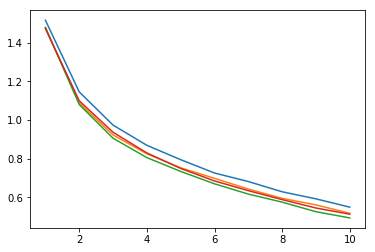

In [67]:
mat3=sio.loadmat('NosAdam_3e-4.mat')
LOSS3=mat3['loss'].reshape(max_epoch)
mat4=sio.loadmat('NosAdam_4e-4.mat')
LOSS4=mat4['loss'].reshape(max_epoch)
mat5=sio.loadmat('NosAdam_5e-4.mat')
LOSS5=mat5['loss'].reshape(max_epoch)
mat6=sio.loadmat('NosAdam_6e-4.mat')
LOSS6=mat6['loss'].reshape(max_epoch)

plt.plot(idx, LOSS3, idx, LOSS4, idx, LOSS5, idx, LOSS6)
# plt.legend('3e-4', '4e-4','5e-4', '6e-4')

### Our final *learaning rate* choice for NosAdam is 5e-4 or 6e-4

## Longer training

In [32]:
max_epoch = 200

In [34]:
learning_rate = 6e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
Test_LOSS = np.zeros([1, max_epoch])
optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=True)
LOSS, Test_LOSS= cifartrain()
sio.savemat('amsgrad_6e-4_200_test.mat', {'loss':LOSS, 'test_loss':Test_LOSS})

epoch0, lossVariable containing:
 1.4702
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.1839
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0784
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.0454
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9067
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8804
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8173
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8290
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7373
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8238
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6808
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.7861
[torch.cuda.FloatTensor of size 1 (G

epoch49, lossVariable containing:
 0.1382
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.3284
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch50, lossVariable containing:
 0.1403
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.2885
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch51, lossVariable containing:
 0.1340
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.2921
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch52, lossVariable containing:
 0.1364
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.3453
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch53, lossVariable containing:
 0.1231
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.3006
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch54, lossVariable containing:
 0.1220
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.3646
[torch.cuda.FloatTensor of siz

epoch96, lossVariable containing:
1.00000e-02 *
  8.8795
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.5753
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch97, lossVariable containing:
1.00000e-02 *
  8.9358
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.5326
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch98, lossVariable containing:
1.00000e-02 *
  9.2818
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6042
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch99, lossVariable containing:
1.00000e-02 *
  8.7308
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6000
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch100, lossVariable containing:
1.00000e-02 *
  9.0248
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6010
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch101, lossVariable containing:
1.00000e-02 *
  9.2175
[torch.cuda.FloatTens

test loss:Variable containing:
 1.7277
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch141, lossVariable containing:
1.00000e-02 *
  7.0144
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6539
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch142, lossVariable containing:
1.00000e-02 *
  7.0562
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6481
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch143, lossVariable containing:
1.00000e-02 *
  7.7526
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.7392
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch144, lossVariable containing:
1.00000e-02 *
  8.1867
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6546
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch145, lossVariable containing:
1.00000e-02 *
  6.6703
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.7435
[torch.cuda.FloatTensor of size 1 (G

epoch185, lossVariable containing:
1.00000e-02 *
  6.2235
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.7572
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch186, lossVariable containing:
1.00000e-02 *
  6.4250
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.7842
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch187, lossVariable containing:
1.00000e-02 *
  5.9941
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.7894
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch188, lossVariable containing:
1.00000e-02 *
  6.1646
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.8108
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch189, lossVariable containing:
1.00000e-02 *
  6.2935
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.8081
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch190, lossVariable containing:
1.00000e-02 *
  6.3541
[torch.cuda.Float

Adam xian bu pao

In [21]:
learning_rate = 6e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
Test_LOSS = np.zeros([1, max_epoch])

optimizer = Adam(net.parameters(), lr=learning_rate, amsgrad=False)
LOSS, Test_LOSS= cifartrain()
# sio.savemat('Adam_6e-4_200.mat', {'loss':LOSS, 'test_loss':Test_LOSS})

epoch0, lossVariable containing:
 1.4714
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0854
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9272
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8275
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7624
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.7046
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6485
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.6065
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5649
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5294
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch10, lossVariable containing:
 0.4938
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch11, lossVariable containing:
 0.4615
[torch.cuda.FloatTenso

epoch96, lossVariable containing:
 0.1333
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch97, lossVariable containing:
 0.1262
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch98, lossVariable containing:
 0.1241
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch99, lossVariable containing:
 0.1299
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch100, lossVariable containing:
 0.1219
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch101, lossVariable containing:
 0.1318
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch102, lossVariable containing:
 0.1220
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch103, lossVariable containing:
 0.1242
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch104, lossVariable containing:
 0.1250
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch105, lossVariable containing:
 0.1341
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch106, lossVariable containing:
 0.1319
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch107, lossVariable containing:
 0.1231
[tor

epoch190, lossVariable containing:
 0.1103
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch191, lossVariable containing:
 0.1067
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch192, lossVariable containing:
 0.1096
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch193, lossVariable containing:
 0.1120
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch194, lossVariable containing:
 0.1076
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch195, lossVariable containing:
 0.1004
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch196, lossVariable containing:
 0.1056
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch197, lossVariable containing:
 0.1132
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch198, lossVariable containing:
 0.1118
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch199, lossVariable containing:
 0.1090
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


## 如果还要测试，先不跑Adam了……最终版本的时候再跑

In [22]:
# learning_rate = 6e-4
# max_epoch = 50

# net = OurCifarNet()
# net = net.cuda()
# criterion = nn.CrossEntropyLoss()
# LOSS = np.zeros([1, max_epoch])

# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
# LOSS= cifartrain()
# sio.savemat('NosAdam_6e-4.mat', {'loss':LOSS})

In [ ]:
learning_rate = 5e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
Test_LOSS = np.zeros([1, max_epoch])
optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1)
LOSS, Test_LOSS= cifartrain()
sio.savemat('NosAdam_5e-4_200_test.mat', {'loss':LOSS, 'test_loss':Test_LOSS})

In [35]:
learning_rate = 5e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
Test_LOSS = np.zeros([1, max_epoch])
optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.05)
LOSS, Test_LOSS= cifartrain()
sio.savemat('NosAdam_5e-4_200_test1.mat', {'loss':LOSS, 'test_loss':Test_LOSS})

epoch0, lossVariable containing:
 1.4826
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.1915
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0764
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.0165
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9112
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8998
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8101
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8551
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7383
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8226
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6749
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 0.8212
[torch.cuda.FloatTensor of size 1 (G

epoch49, lossVariable containing:
 0.1430
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.2692
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch50, lossVariable containing:
 0.1460
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.3287
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch51, lossVariable containing:
 0.1426
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.2927
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch52, lossVariable containing:
 0.1334
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.2464
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch53, lossVariable containing:
 0.1326
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.2655
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch54, lossVariable containing:
 0.1340
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.3257
[torch.cuda.FloatTensor of siz

test loss:Variable containing:
 1.5196
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch98, lossVariable containing:
 0.1085
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.4989
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch99, lossVariable containing:
 0.1039
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.5251
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch100, lossVariable containing:
 0.1084
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.5937
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch101, lossVariable containing:
 0.1092
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.5385
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch102, lossVariable containing:
 0.1052
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6079
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch103, lossVariable containing:
 0.1084
[torch.cuda.FloatTensor of

epoch144, lossVariable containing:
1.00000e-02 *
  9.7913
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.7118
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch145, lossVariable containing:
 0.1029
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6261
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch146, lossVariable containing:
1.00000e-02 *
  9.3291
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6122
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch147, lossVariable containing:
1.00000e-02 *
  9.2904
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6387
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch148, lossVariable containing:
1.00000e-02 *
  9.3460
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.6854
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch149, lossVariable containing:
1.00000e-02 *
  9.4899
[torch.cuda.FloatTensor of size 

epoch189, lossVariable containing:
1.00000e-02 *
  9.2058
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.7886
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch190, lossVariable containing:
1.00000e-02 *
  9.4715
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.8081
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch191, lossVariable containing:
1.00000e-02 *
  9.5065
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.7745
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch192, lossVariable containing:
1.00000e-02 *
  8.5318
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.8077
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch193, lossVariable containing:
1.00000e-02 *
  8.9875
[torch.cuda.FloatTensor of size 1 (GPU 0)]

test loss:Variable containing:
 1.8935
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch194, lossVariable containing:
 0.1012
[torch.cuda.FloatTensor of size 

$\gamma=0.05$ is better than $\gamma=0.1$

In [37]:
# # No test
# learning_rate = 5e-4

# net = OurCifarNet()
# net = net.cuda()
# criterion = nn.CrossEntropyLoss()
# LOSS = np.zeros([1, max_epoch])
# Test_LOSS = np.zeros([1, max_epoch])
# optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.03)
# LOSS, Test_LOSS= cifartrain()
# sio.savemat('NosAdam_5e-4_200_test2.mat', {'loss':LOSS, 'test_loss':Test_LOSS})

epoch0, lossVariable containing:
 1.4602
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0610
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.8944
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8068
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7260
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6708
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6166
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5679
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5297
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.4932
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch10, lossVariable containing:
 0.4675
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch11, lossVariable containing:
 0.4349
[torch.cuda.FloatTenso

epoch96, lossVariable containing:
 0.1113
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch97, lossVariable containing:
 0.1039
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch98, lossVariable containing:
 0.1068
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch99, lossVariable containing:
 0.1151
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch100, lossVariable containing:
 0.1060
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch101, lossVariable containing:
 0.1084
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch102, lossVariable containing:
 0.1058
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch103, lossVariable containing:
 0.1087
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch104, lossVariable containing:
 0.1025
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch105, lossVariable containing:
 0.1075
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch106, lossVariable containing:
 0.1091
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch107, lossVariable containing:
 0.1037
[tor

epoch183, lossVariable containing:
1.00000e-02 *
  9.5208
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch184, lossVariable containing:
1.00000e-02 *
  8.8792
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch185, lossVariable containing:
1.00000e-02 *
  9.1313
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch186, lossVariable containing:
1.00000e-02 *
  9.1694
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch187, lossVariable containing:
1.00000e-02 *
  9.7938
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch188, lossVariable containing:
 0.1006
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch189, lossVariable containing:
 0.1003
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch190, lossVariable containing:
1.00000e-02 *
  8.6537
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch191, lossVariable containing:
1.00000e-02 *
  9.9311
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch192, lossVariable containing:
1.00000e-02 *
  9.6308
[torch.cuda.FloatTensor of size 1 (GPU 0)]



KeyboardInterrupt: 

In [39]:
# No test
learning_rate = 4.5e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])
Test_LOSS = np.zeros([1, max_epoch])
optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.05)
LOSS, Test_LOSS= cifartrain()
sio.savemat('NosAdam_5e-4_200_test2.mat', {'loss':LOSS, 'test_loss':Test_LOSS})

epoch0, lossVariable containing:
 1.5096
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.1185
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9474
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8407
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7610
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6954
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6443
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5988
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5587
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5165
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch10, lossVariable containing:
 0.4829
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch11, lossVariable containing:
 0.4537
[torch.cuda.FloatTenso

epoch96, lossVariable containing:
 0.1028
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch97, lossVariable containing:
 0.1052
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch98, lossVariable containing:
1.00000e-02 *
  9.9487
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch99, lossVariable containing:
1.00000e-02 *
  9.7075
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch100, lossVariable containing:
1.00000e-02 *
  9.0478
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch101, lossVariable containing:
 0.1074
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch102, lossVariable containing:
1.00000e-02 *
  9.7058
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch103, lossVariable containing:
1.00000e-02 *
  9.4325
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch104, lossVariable containing:
1.00000e-02 *
  9.5126
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch105, lossVariable containing:
 0.1008
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch106, lossVariable containing:
 0.1011
[

epoch178, lossVariable containing:
1.00000e-02 *
  8.3748
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch179, lossVariable containing:
1.00000e-02 *
  7.8254
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch180, lossVariable containing:
1.00000e-02 *
  9.2147
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch181, lossVariable containing:
1.00000e-02 *
  8.6188
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch182, lossVariable containing:
1.00000e-02 *
  9.1789
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch183, lossVariable containing:
1.00000e-02 *
  8.9694
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch184, lossVariable containing:
1.00000e-02 *
  8.1389
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch185, lossVariable containing:
1.00000e-02 *
  8.3142
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch186, lossVariable containing:
1.00000e-02 *
  7.8983
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch187, lossVariable containing:
1.00000e-02 *
  8.8705
[torch.cuda.FloatTensor 

In [26]:
learning_rate = 5e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])

optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0)
LOSS= cifartrain()
sio.savemat('NosAdam_5e-4_100.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4922
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0841
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9168
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8121
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7402
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6803
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6359
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5851
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5469
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5042
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch10, lossVariable containing:
 0.4729
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch11, lossVariable containing:
 0.4455
[torch.cuda.FloatTenso

epoch96, lossVariable containing:
 0.1084
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch97, lossVariable containing:
 0.1060
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch98, lossVariable containing:
 0.1055
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch99, lossVariable containing:
 0.1096
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch100, lossVariable containing:
 0.1119
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch101, lossVariable containing:
 0.1116
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch102, lossVariable containing:
 0.1017
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch103, lossVariable containing:
 0.1082
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch104, lossVariable containing:
 0.1052
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch105, lossVariable containing:
 0.1099
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch106, lossVariable containing:
 0.1066
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch107, lossVariable containing:
 0.1087
[tor

epoch183, lossVariable containing:
1.00000e-02 *
  9.2425
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch184, lossVariable containing:
1.00000e-02 *
  9.4160
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch185, lossVariable containing:
1.00000e-02 *
  9.4304
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch186, lossVariable containing:
1.00000e-02 *
  8.9906
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch187, lossVariable containing:
1.00000e-02 *
  9.4836
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch188, lossVariable containing:
1.00000e-02 *
  9.3195
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch189, lossVariable containing:
1.00000e-02 *
  9.0903
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch190, lossVariable containing:
1.00000e-02 *
  9.5359
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch191, lossVariable containing:
 0.1023
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch192, lossVariable containing:
1.00000e-02 *
  9.8517
[torch.cuda.FloatTensor of size 1 (GPU 

In [29]:
learning_rate = 5e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])

optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.2)
LOSS= cifartrain()
sio.savemat('NosAdam2_5e-4_100.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4554
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0658
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.8942
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.7978
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7239
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6663
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6109
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5680
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5298
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.4893
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch10, lossVariable containing:
 0.4557
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch11, lossVariable containing:
 0.4299
[torch.cuda.FloatTenso

epoch96, lossVariable containing:
 0.1000
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch97, lossVariable containing:
 0.1078
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch98, lossVariable containing:
 0.1142
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch99, lossVariable containing:
 0.1082
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch100, lossVariable containing:
 0.1030
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch101, lossVariable containing:
 0.1126
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch102, lossVariable containing:
 0.1182
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch103, lossVariable containing:
 0.1103
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch104, lossVariable containing:
 0.1110
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch105, lossVariable containing:
 0.1058
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch106, lossVariable containing:
 0.1153
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch107, lossVariable containing:
 0.1045
[tor

epoch185, lossVariable containing:
1.00000e-02 *
  9.8762
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch186, lossVariable containing:
 0.1024
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch187, lossVariable containing:
 0.1000
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch188, lossVariable containing:
 0.1001
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch189, lossVariable containing:
1.00000e-02 *
  9.8107
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch190, lossVariable containing:
1.00000e-02 *
  9.3519
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch191, lossVariable containing:
 0.1008
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch192, lossVariable containing:
1.00000e-02 *
  9.5880
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch193, lossVariable containing:
1.00000e-02 *
  9.9043
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch194, lossVariable containing:
1.00000e-02 *
  9.0376
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch195, lossVariable containing:
1.000

In [30]:
learning_rate = 5e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])

optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.3)
LOSS= cifartrain()
sio.savemat('NosAdam3_5e-4_100.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4519
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0774
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9161
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8161
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7460
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6843
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6241
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5886
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5439
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5033
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch10, lossVariable containing:
 0.4772
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch11, lossVariable containing:
 0.4345
[torch.cuda.FloatTenso

epoch96, lossVariable containing:
 0.1069
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch97, lossVariable containing:
 0.1173
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch98, lossVariable containing:
 0.1026
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch99, lossVariable containing:
 0.1057
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch100, lossVariable containing:
 0.1048
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch101, lossVariable containing:
 0.1033
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch102, lossVariable containing:
 0.1053
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch103, lossVariable containing:
 0.1071
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch104, lossVariable containing:
 0.1127
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch105, lossVariable containing:
 0.1018
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch106, lossVariable containing:
 0.1083
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch107, lossVariable containing:
 0.1051
[tor

epoch183, lossVariable containing:
1.00000e-02 *
  9.8533
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch184, lossVariable containing:
1.00000e-02 *
  9.2932
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch185, lossVariable containing:
 0.1009
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch186, lossVariable containing:
1.00000e-02 *
  9.4982
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch187, lossVariable containing:
1.00000e-02 *
  9.5410
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch188, lossVariable containing:
1.00000e-02 *
  9.8280
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch189, lossVariable containing:
1.00000e-02 *
  9.2646
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch190, lossVariable containing:
1.00000e-02 *
  9.7294
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch191, lossVariable containing:
1.00000e-02 *
  9.0305
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch192, lossVariable containing:
1.00000e-02 *
  9.9204
[torch.cuda.FloatTensor of size 1 (GPU 

### Experiment also shows NosAdam is insensitive to $\gamma$

In [31]:
max_epoch=10

In [32]:
learning_rate = 5e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])

optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.3)
LOSS= cifartrain()
# sio.savemat('NosAdam3_5e-4_100.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4852
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0744
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9012
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.7997
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7253
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6672
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6137
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5676
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5280
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.4952
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Finished Training


When $\gamma = 0.3$, the best learning rate is still 5e-4.

#### We now try learning rate decay scheme for AdaStab and AMSGrad

In [14]:
max_epoch = 200

In [8]:
learning_rate = 5e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])

optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1, lr_decay=True)
LOSS= cifartrain()
# sio.savemat('NosAdam3_5e-4_100.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4842
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0838
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9249
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8292
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7463
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6824
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6286
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5845
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5450
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5037
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch10, lossVariable containing:
 0.4703
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch11, lossVariable containing:
 0.4372
[torch.cuda.FloatTenso

In [13]:
learning_rate = 6e-4

net = OurCifarNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
LOSS = np.zeros([1, max_epoch])

optimizer = AdaStab(net.parameters(), lr=learning_rate, gamma=0.1, lr_decay=True)
LOSS= cifartrain()
# sio.savemat('NosAdam3_5e-4_100.mat', {'loss':LOSS})

epoch0, lossVariable containing:
 1.4657
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch1, lossVariable containing:
 1.0694
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch2, lossVariable containing:
 0.9147
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch3, lossVariable containing:
 0.8141
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch4, lossVariable containing:
 0.7405
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch5, lossVariable containing:
 0.6777
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch6, lossVariable containing:
 0.6306
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch7, lossVariable containing:
 0.5859
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch8, lossVariable containing:
 0.5376
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch9, lossVariable containing:
 0.5040
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch10, lossVariable containing:
 0.4696
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch11, lossVariable containing:
 0.4482
[torch.cuda.FloatTenso

#### Adding lr decay has no improvement on NosAdam